# Training and Improving Neural Networks

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets.fashion_mnist import load_data

from tensorflow.keras.utils import plot_model

from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.layers import Layer, Input, Flatten, Dense, Dropout, Concatenate, BatchNormalization

import torch
import torch.nn as nn

In [2]:
# load_data()[0][0]

With tensorflow:

In [3]:
class MyLinear(Layer):
    def __init__(self, units = 32, input_dim = 32):
        super().__init__()
        self.w = self.add_weight(
            shape = (input_dim, units),
            initializer = "random_normal")
        self.b = self.add_weight(
            shape = (units,),
            initializer = "zeros")
    
    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

With pytorch:

In [4]:
class MyLinear(nn.Module):
    def __init__(self, in_units, units):
        super().__init__()
        self.weight = nn.Parameter(
            torch.randn(in_units, units))
        self.bias = nn.Parameter(
            torch.randn(units,))
    
def forward(self, X):
    return torch.matmul(
        X, self.weight.data) + self.bias.data

In [5]:
tf.keras.backend.clear_session()

In [6]:
((attributes_train, labels_train), (attributes_test, labels_test)) = load_data()

In [7]:
attributes_train.shape

(60000, 28, 28)

In [8]:
len(set(labels_train))

10

In [9]:
pd.DataFrame(labels_train).value_counts()

0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
dtype: int64

In [10]:
pd.DataFrame(labels_test).value_counts()

0    1000
1    1000
2    1000
3    1000
4    1000
5    1000
6    1000
7    1000
8    1000
9    1000
dtype: int64

In [11]:
# attributes_train.reshape(60_000, -1).shape

In [12]:
input_layer = Input((28, 28))
flatten_layer = Flatten()(input_layer)
layer1 = Dense(64, activation = "relu")(flatten_layer)
layer2 = Dense(128, activation = "relu")(layer1)
layer3 = Dense(64, activation = "relu")(layer2)
output_layer = Dense(10, activation = "softmax")(layer3)

In [13]:
output_layer

<KerasTensor shape=(None, 10), dtype=float32, sparse=False, name=keras_tensor_5>

In [14]:
model = Model(inputs = input_layer, outputs = output_layer)

In [15]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 67,466 (263.54 KB)

 Trainable params: 67,466 (263.54 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
Model(inputs = input_layer, outputs = layer2).summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,560 (228.75 KB)

 Trainable params: 58,560 (228.75 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model(attributes_train[:20]).numpy()

array([[0.0000000e+00, 0.0000000e+00, 5.8157880e-19, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 8.5101227e-34],
       [0.0000000e+00, 0.0000000e+00, 5.4200529e-11, 0.0000000e+00,
        0.0000000e+00, 1.3479937e-36, 0.0000000e+00, 9.9999809e-01,
        0.0000000e+00, 1.8776677e-06],
       [0.0000000e+00, 0.0000000e+00, 2.4343618e-19, 0.0000000e+00,
        0.0000000e+00, 9.7996281e-31, 0.0000000e+00, 2.8538760e-10,
        0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.4518508e-11, 0.0000000e+00,
        0.0000000e+00, 1.2947298e-28, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 5.9896816e-09],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.5949809e-15, 0.0000000e+00, 3.5279332e-14,
        0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 3.2559376e-05, 0.0000000e+00,
        0.0000000e+00, 8.6042229e-17, 0.0000000e+00, 2.18

In [18]:
block_beginning = Dense(20)(flatten_layer)

block_a1 = Dense(30, activation = "relu")(block_beginning)
block_a2 = Dense(11, activation = "relu")(block_a1)
block_a3 = Dense(11, activation = "relu")(block_a2)

block_b = Dense(20, activation = "relu")(block_beginning)
block_c = Dense(50, activation = "relu")(block_beginning)

block_end = Concatenate()([block_a3, block_b, block_c])

In [19]:
block = Model(inputs = block_beginning, outputs = block_end)

In [20]:
block.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ keras_tensor_6CLONE           │ (None, 20)                │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_5 (Dense)               │ (None, 30)                │             630 │ keras_tensor_6CLONE[1][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_6 (Dense)               │ (None, 11)                │             341 │ dense_5[1][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_7 (Dense)               │ (None, 11)                │             132 │ dense_6[1][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_8 (Dense)               │ (None, 20)                │             420 │ keras_tensor_6CLONE[1][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_9 (Dense)               │ (None, 50)                │           1,050 │ keras_tensor_6CLONE[1][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate (Concatenate)     │ (None, 81)                │               0 │ dense_7[1][0],             │
│                               │                           │                 │ dense_8[1][0],             │
│                               │                           │                 │ dense_9[1][0]              │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 2,573 (10.05 KB)

 Trainable params: 2,573 (10.05 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# plot_model(model)  #not working on Windows

In [22]:
final_layer = Dense(20, activation = "relu")(block.output)

In [23]:
Model(inputs = block.input, outputs = final_layer).summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ keras_tensor_6CLONE           │ (None, 20)                │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_5 (Dense)               │ (None, 30)                │             630 │ keras_tensor_6CLONE[1][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_6 (Dense)               │ (None, 11)                │             341 │ dense_5[1][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_7 (Dense)               │ (None, 11)                │             132 │ dense_6[1][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_8 (Dense)               │ (None, 20)                │             420 │ keras_tensor_6CLONE[1][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_9 (Dense)               │ (None, 50)                │           1,050 │ keras_tensor_6CLONE[1][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate (Concatenate)     │ (None, 81)                │               0 │ dense_7[1][0],             │
│                               │                           │                 │ dense_8[1][0],             │
│                               │                           │                 │ dense_9[1][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_10 (Dense)              │ (None, 20)                │           1,640 │ concatenate[1][0]          │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 4,213 (16.46 KB)

 Trainable params: 4,213 (16.46 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [25]:
# #custom loss function
# class DoubleClassificationLoss(tf.keras.losses.Loss):
#     def call(self, y_true, y_pred):
#         return tf.keras.losses.SparseCategoricalCrossentropy

In [26]:
model.fit(attributes_train, labels_train, epochs = 10, callbacks = [TensorBoard()])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6711 - loss: 3.3294
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8019 - loss: 0.5869
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8282 - loss: 0.4982
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8415 - loss: 0.4457
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8538 - loss: 0.4120
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8522 - loss: 0.4094
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8559 - loss: 0.3942
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8616 - loss: 0.3817
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8649 - loss: 0.3645
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8667 - loss: 0.3596


In [27]:
model.evaluate(attributes_test, labels_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8441 - loss: 0.4472


[0.44487276673316956, 0.8406000137329102]

In [28]:
%load_ext tensorboard

In [29]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 32816), started 0:09:36 ago. (Use '!kill 32816' to kill it.)

(array([[0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-0.05299402, -0.04996463, -0.04693523, -0.04390584, -0.04087644,
        -0.03784705, -0.03481766, -0.03178827, -0.02875887, -0.02572948,
        -0.02270009, -0.0196707 , -0.0166413 , -0.01361191, -0.01058252,
        -0.00755313, -0.00452373, -0.00149434,  0.00153505,  0.00456445,
         0.00759384,  0.01062323,  0.01365262,  0.01668202,  0.01971141],
       dtype=float32),
 <a list of 784 BarContainer objects>)

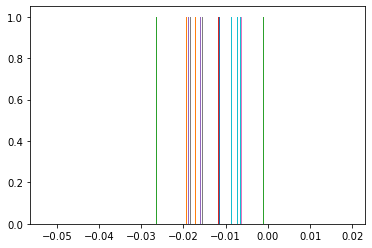

In [35]:
plt.hist(tf.reduce_mean(model.layers[2].weights[0].numpy(), axis = -1), bins = "fd")

### Use Dropout

In [31]:
# # sequential api
# [Dense(), Dropout()]

In [32]:
input_layer = Input((28, 28))
flatten_layer = Flatten()(input_layer)
Dropout(0.01)
layer1 = Dense(64, activation = "relu")(flatten_layer)
layer2 = Dense(128, activation = "relu")(layer1)
layer2 = Dropout(0.1)(layer2)
layer3 = Dense(64, activation = "relu")(layer2)
output_layer = Dense(10, activation = "softmax")(layer3)